In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
dfs=[]
file_list = glob('./data_cafe/*.csv')
for each_file in file_list:
    df = pd.read_csv(each_file, index_col=0,thousands = ',')
    dfs.append(df)

df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)

In [3]:
df = df[['name','date','like', 'con_count', 'follower', 'follow', 'link']]
df=df[df['follower']!=' ']
df = df[(df['like'].notnull()) & (df['con_count'].notnull() &df['follower'].notnull() & df['follow'].notnull())]
df['like']=df['like'].astype('int64')
df['follower']=df['follower'].astype('int64')
df['follow']=df['follow'].astype('int64')

df = df[(df['like']>10) & (df['follower']>10) & (df['follow']>10)]

df.head()

,name,date,like,con_count,follower,follow,link
0,3flobby,2020-05-14,941,980,114000,853,https://www.instagram.com/soyppi/
1,3flobby,2020-08-28,1403,211,149000,225,https://www.instagram.com/_yoonic/
2,3flobby,2020-11-25,480,333,156000,233,https://www.instagram.com/ssarl.k/
3,3flobby,2020-03-15,2053,997,104000,177,https://www.instagram.com/yeon.sun/
4,3flobby,2020-08-04,476,115,2613,1134,https://www.instagram.com/mg_s.h_/


In [4]:
# thousands ',' 과정에서 일부만 숫자로 일부는 str로 바뀜 
# 맨처음부터 replace로 바꿀경우에는 숫자는 다없어짐 그래서 모두 str로 다시 바꿔주고 float - int로 바꿔주니 성공!
df['con_count']=df['con_count'].astype('str')
df=df[df['con_count']!=' ']
df['con_count']=df['con_count'].str.replace(',','').astype('float')
df['con_count']=df['con_count'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19970 entries, 0 to 24499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       19970 non-null  object
 1   date       19970 non-null  object
 2   like       19970 non-null  int64 
 3   con_count  19970 non-null  int64 
 4   follower   19970 non-null  int64 
 5   follow     19970 non-null  int64 
 6   link       19970 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
# import re

# df['con_count'] = df['con_count'].astype(str)
# # ','없애주기
# ls = df[df['con_count'].str.contains(',')].index
# for j in ls:
#     df.loc[j,'con_count'] = re.sub(',','',df.loc[j,'con_count'])
# # '.'없애주기
# ls_1 = df[df['con_count'].str.contains('.')].index
# for j in ls_1:
#     df.loc[j,'con_count'] = re.sub('.0','',df.loc[j,'con_count'])
# df['con_count']=df['con_count'].astype('int64')
# df.info()


In [6]:
df.isnull().sum()

name         0
date         0
like         0
con_count    0
follower     0
follow       0
link         0
dtype: int64

c:\users\wjdgp\anaconda3\envs\fc15\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


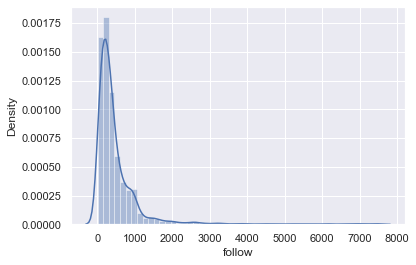

In [7]:
sns.distplot(df['follow']);

In [8]:
# 팔로우 3000이상 버림
df_1=df[df['follow']<3000]

c:\users\wjdgp\anaconda3\envs\fc15\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


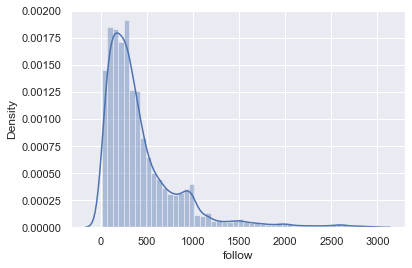

In [9]:
sns.distplot(df_1['follow']);

In [10]:
df[df['follow']>3000]

,name,date,like,con_count,follower,follow,link
116,3flobby,2020-11-03,505,193,3321,3527,https://www.instagram.com/pyoungmin88/
270,3flobby,2020-10-04,154,456,6178,3125,https://www.instagram.com/in_the_a.i.r/
541,3flobby,2020-07-29,187,853,204000,7192,https://www.instagram.com/kebiya/
716,3flobby,2020-06-29,175,467,124000,3254,https://www.instagram.com/areumdaum/
727,3flobby,2020-06-28,126,7940,3311,5225,https://www.instagram.com/cafe_in_full/
...,...,...,...,...,...,...,...
24411,자그마치카페,2018-03-25,51,2582,2668,6860,https://www.instagram.com/yanggyeonghwa1611/
24413,자그마치카페,2018-03-24,61,2582,2668,6860,https://www.instagram.com/yanggyeonghwa1611/
24423,자그마치카페,2018-03-06,41,13569,2819,5251,https://www.instagram.com/dorothybaek_art/
24424,자그마치카페,2018-03-06,87,13569,2819,5251,https://www.instagram.com/dorothybaek_art/


c:\users\wjdgp\anaconda3\envs\fc15\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


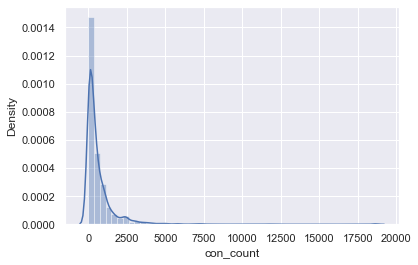

In [11]:
sns.distplot(df_1['con_count']);

In [12]:
df[df['con_count']>4000]

,name,date,like,con_count,follower,follow,link
177,3flobby,2020-10-21,58,4915,1221,488,https://www.instagram.com/hopi_1212/
345,3flobby,2020-09-15,37,5023,221,296,https://www.instagram.com/zureem.nov/
346,3flobby,2020-09-15,35,5023,221,296,https://www.instagram.com/zureem.nov/
502,3flobby,2020-08-04,716,5141,202000,943,https://www.instagram.com/jangmini/
582,3flobby,2020-07-21,47,6670,2362,805,https://www.instagram.com/kchae_life/
...,...,...,...,...,...,...,...
24244,자그마치카페,2019-04-03,28,13569,2819,5251,https://www.instagram.com/dorothybaek_art/
24245,자그마치카페,2019-04-03,19,13569,2819,5251,https://www.instagram.com/dorothybaek_art/
24423,자그마치카페,2018-03-06,41,13569,2819,5251,https://www.instagram.com/dorothybaek_art/
24424,자그마치카페,2018-03-06,87,13569,2819,5251,https://www.instagram.com/dorothybaek_art/


In [13]:
df_1 = df_1[df_1['con_count']<4000]

c:\users\wjdgp\anaconda3\envs\fc15\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


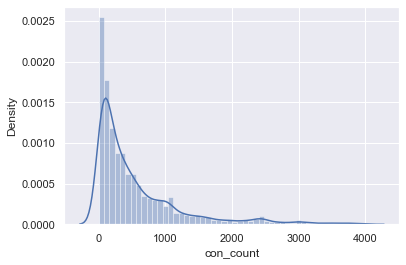

In [14]:
sns.distplot(df_1['con_count']);

c:\users\wjdgp\anaconda3\envs\fc15\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


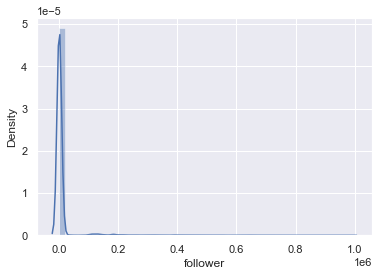

In [15]:
sns.distplot(df_1['follower']);

In [16]:
df_1=df_1[df_1['follower']<4000]

c:\users\wjdgp\anaconda3\envs\fc15\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


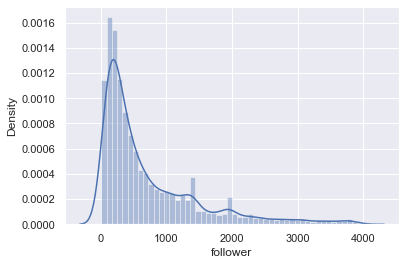

In [17]:
sns.distplot(df_1['follower']);

In [18]:
# fig= go.Figure()
# fig.add_trace(go.Box(y=df_1['follower'], name= 'follower'))
# fig.add_trace(go.Box(y=df_1['follow'], name= 'follow'))
# fig.add_trace(go.Box(y=df_1['con_count'], name= 'con_count'))
# # fig.add_trace(go.Box(y=df_1['fxf'], name= 'fxf'))

NameError: name 'go' is not defined

In [24]:
df_2=df_1[df_1['follower']<2307]
df_2=df_1[df_1['follow']<1011]
df_2=df_1[df_1['con_count']<1500]
df_2

,name,date,like,con_count,follower,follow,link
4,3flobby,2020-08-04,476,115,2613,1134,https://www.instagram.com/mg_s.h_/
5,3flobby,2020-07-28,638,186,2552,394,https://www.instagram.com/jihyeonn_06/
6,3flobby,2020-08-28,317,195,1087,209,https://www.instagram.com/ky0ungah/
7,3flobby,2020-09-23,696,29,1359,470,https://www.instagram.com/j.in25/
9,3flobby,2020-11-26,13,415,65,66,https://www.instagram.com/melody.h.j/
...,...,...,...,...,...,...,...
24495,자그마치카페,2017-11-07,64,228,99,137,https://www.instagram.com/blumejh/
24496,자그마치카페,2017-11-04,64,422,332,719,https://www.instagram.com/gracia__eun/
24497,자그마치카페,2017-11-03,88,253,382,278,https://www.instagram.com/sse_y0ng/
24498,자그마치카페,2017-11-02,47,1452,737,900,https://www.instagram.com/cheon.lee.9/


In [25]:
df_1['fxf'] = np.log1p(df_1['follower']/df_1['follow'])

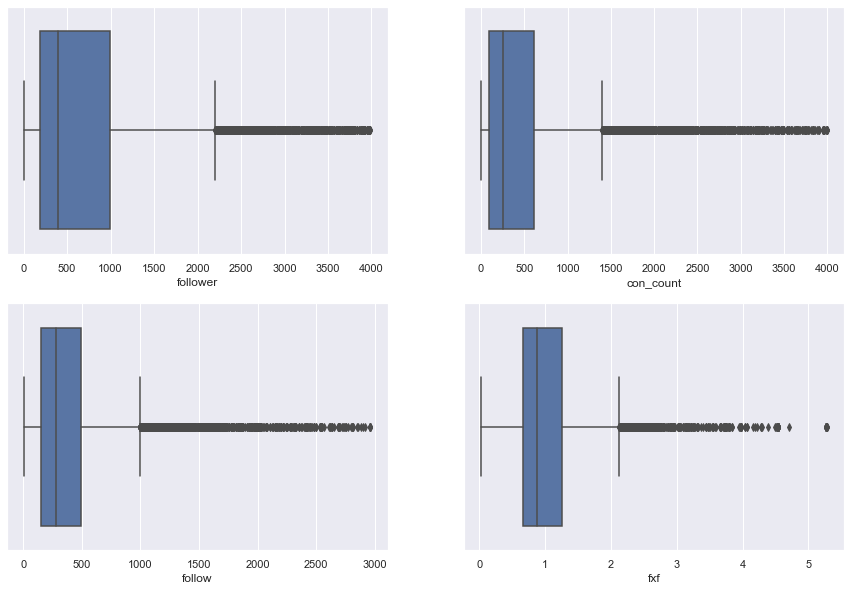

In [26]:
sns.set_style('darkgrid')

sns.set(rc={'figure.figsize' : (15,10)})
fig,ax = plt.subplots(nrows=2, ncols=2)

sns.boxplot(x='follower', data=df_1, ax = ax[0,0]) 
sns.boxplot(x='con_count', data=df_1, ax = ax[0,1])
sns.boxplot(x='follow', data=df_1, ax = ax[1,0])
sns.boxplot(x='fxf', data=df_1, ax = ax[1,1]);

In [27]:
df_1[df_1['fxf']>3]

,name,date,like,con_count,follower,follow,link,fxf
79,3flobby,2020-05-27,193,26,1595,71,https://www.instagram.com/___luv__mi/,3.155501
135,3flobby,2020-10-30,55,2343,2368,96,https://www.instagram.com/opaaap_muse/,3.245193
168,3flobby,2020-10-23,49,109,568,26,https://www.instagram.com/nothing_but_candy/,3.128783
466,3flobby,2020-08-13,288,96,1317,68,https://www.instagram.com/_beautyinside_____/,3.013948
472,3flobby,2020-08-12,260,96,1317,68,https://www.instagram.com/_beautyinside_____/,3.013948
...,...,...,...,...,...,...,...,...
23179,음레코드,2020-10-12,113,367,3477,18,https://www.instagram.com/flex__seoul/,5.268717
23525,뷰클랜드,2020-11-25,87,253,1594,60,https://www.instagram.com/cafe.flex/,3.316607
23559,뷰클랜드,2020-11-19,267,38,2852,147,https://www.instagram.com/gard_enn/,3.015602
23957,뷰클랜드,2020-09-18,46,274,647,27,https://www.instagram.com/urbantrend_ohkong/,3.217393


In [28]:
df_1.corr()

,like,con_count,follower,follow,fxf
like,1.000000,-0.061348,0.540967,0.283439,0.281480
con_count,-0.061348,1.000000,0.254252,0.247587,0.093768
follower,0.540967,0.254252,1.000000,0.479599,0.580740
follow,0.283439,0.247587,0.479599,1.000000,-0.221130
fxf,0.281480,0.093768,0.580740,-0.221130,1.000000


In [29]:
df_2.corr()

,like,con_count,follower,follow
like,1.000000,-0.037281,0.558145,0.302936
con_count,-0.037281,1.000000,0.251875,0.231369
follower,0.558145,0.251875,1.000000,0.481617
follow,0.302936,0.231369,0.481617,1.000000


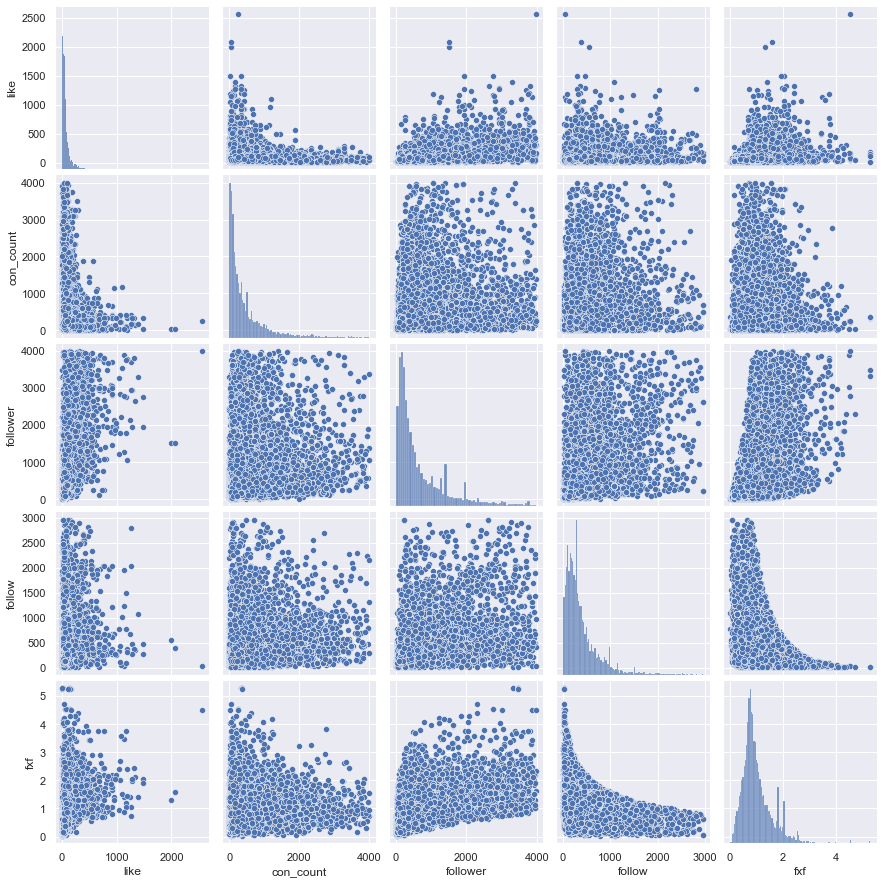

In [30]:
sns.pairplot(df_1)

In [31]:
df_1['fxf'] = df_1['follower']/df_1['follow']
df_1

,name,date,like,con_count,follower,follow,link,fxf
4,3flobby,2020-08-04,476,115,2613,1134,https://www.instagram.com/mg_s.h_/,2.304233
5,3flobby,2020-07-28,638,186,2552,394,https://www.instagram.com/jihyeonn_06/,6.477157
6,3flobby,2020-08-28,317,195,1087,209,https://www.instagram.com/ky0ungah/,5.200957
7,3flobby,2020-09-23,696,29,1359,470,https://www.instagram.com/j.in25/,2.891489
9,3flobby,2020-11-26,13,415,65,66,https://www.instagram.com/melody.h.j/,0.984848
...,...,...,...,...,...,...,...,...
24495,자그마치카페,2017-11-07,64,228,99,137,https://www.instagram.com/blumejh/,0.722628
24496,자그마치카페,2017-11-04,64,422,332,719,https://www.instagram.com/gracia__eun/,0.461752
24497,자그마치카페,2017-11-03,88,253,382,278,https://www.instagram.com/sse_y0ng/,1.374101
24498,자그마치카페,2017-11-02,47,1452,737,900,https://www.instagram.com/cheon.lee.9/,0.818889


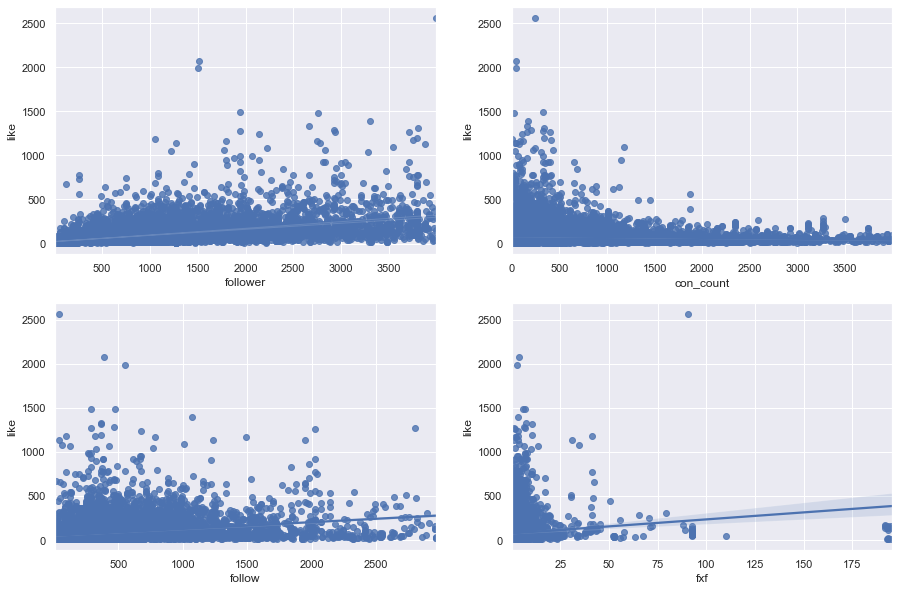

In [32]:
sns.set_style('darkgrid')

sns.set(rc={'figure.figsize' : (15,10)})
fig,ax = plt.subplots(nrows=2, ncols=2)

sns.regplot(x='follower', y = 'like', data = df_1, ax = ax[0,0]) 
sns.regplot(x='con_count', y = 'like', data = df_1, ax = ax[0,1])
sns.regplot(x='follow', y = 'like', data = df_1, ax = ax[1,0])
sns.regplot(x='fxf', y = 'like', data = df_1, ax = ax[1,1]);

In [33]:
df_1[df_1['like']>1400]

,name,date,like,con_count,follower,follow,link,fxf
3464,청수당갤러리,2020-08-17,1986,45,1505,553,https://www.instagram.com/dear_kyobin/,2.721519
12431,카페코히루,2019-11-22,1488,333,1947,289,https://www.instagram.com/cafekohiru/,6.737024
17235,오린지,2020-11-07,1485,26,2756,474,https://www.instagram.com/j_won._.1205/,5.814346
19528,사월의물고기,2020-10-13,2558,248,3986,44,https://www.instagram.com/bbang_is_life/,90.590909
23166,음레코드,2020-10-16,2070,49,1519,390,https://www.instagram.com/dsomys/,3.894872


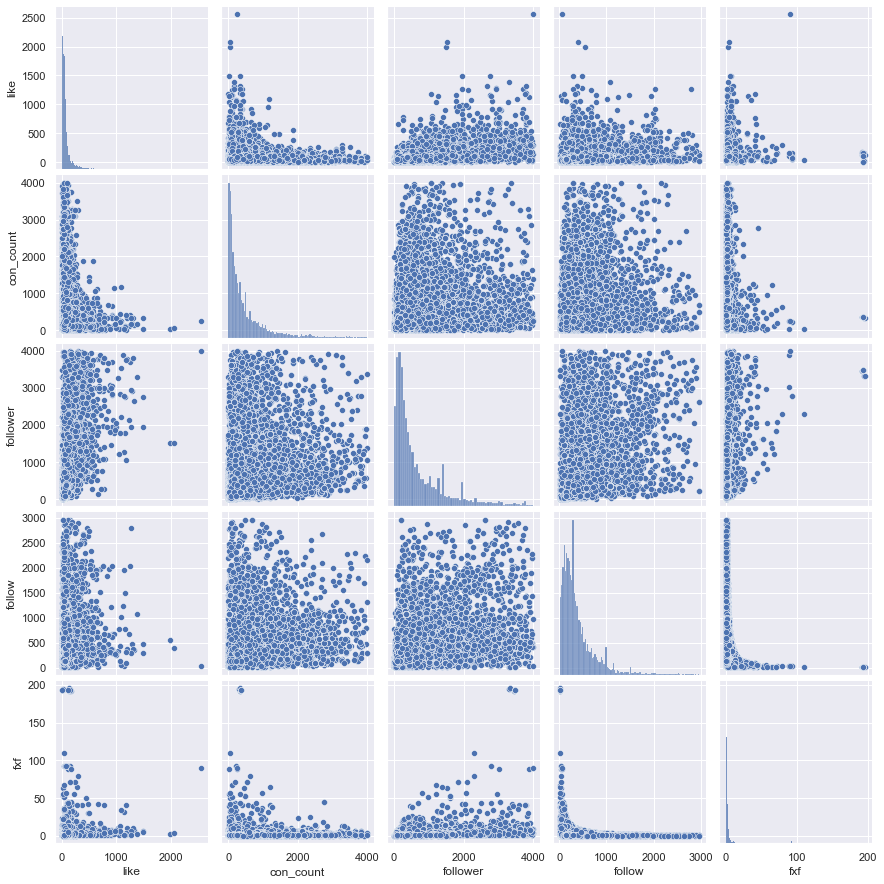

In [34]:
sns.pairplot(df_1);

In [35]:
X = df_1[['follower','follow','con_count','fxf']]
y= df_1['like']

In [36]:
X_log=np.log1p(X)

In [37]:
from sklearn.preprocessing import RobustScaler
rs= RobustScaler()
X_rs= rs.fit_transform(X)

In [38]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_ss= ss.fit_transform(X)

In [39]:
X_rs_pd = pd.DataFrame(X_rs, columns=X.columns)
X_ss_pd

NameError: name 'X_ss_pd' is not defined

In [ ]:
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_ss_pd

In [ ]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 13)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of train data', rmse_tr)
print('RMSE of test data', rmse_test)

In [ ]:
plt.scatter(y_test, pred_test)

plt.xlabel('actual like')
plt.ylabel('predicted like')
plt.title('real vs predicted')
plt.plot([0,1000], [0,1000], 'r');

In [ ]:
reg.predict(np.array([[13600,535,228,3.2]]))

In [ ]:
np.log1p(13600/535)

In [ ]:
df[df['like']>700]

In [ ]:
df.sort_values('follow')

In [ ]:
### IQR

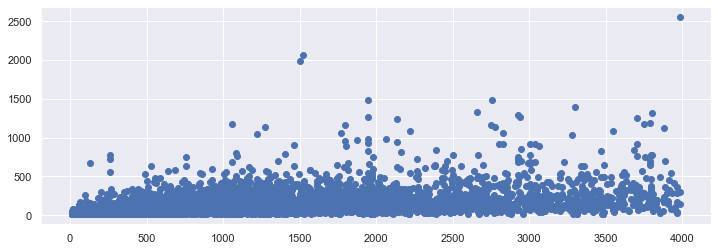

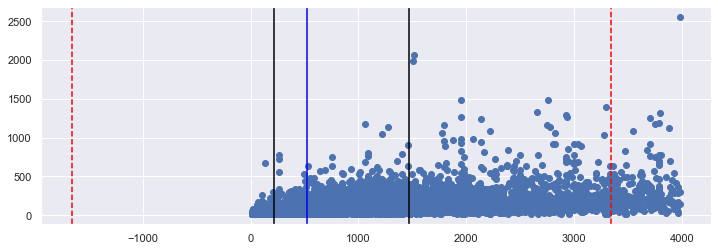

In [42]:
plt.figure(figsize = (12,4))
plt.scatter( x='follower', y ='like', data = df_1)

q1 = np.percentile(df['follower'], 25)
q2 = np.median(df['follower'])
q3 = np.percentile(df['follower'], 75)
iqr = np.percentile(df['follower'], 75) - np.percentile(df['follower'], 25)
follower_upper_fence = q3 + iqr*1.5
follower_lower_fence = q1 - iqr*1.5

plt.figure(figsize = (12,4))
plt.scatter(x = 'follower', y ='like', data = df_1)
plt.axvline(x = q1, color = 'black')
plt.axvline(x = q2, color = 'blue')
plt.axvline(x = q3, color = 'black')
plt.axvline(x = follower_upper_fence, color = 'red', ls = 'dashed')
plt.axvline(x = follower_lower_fence, color = 'red', ls = 'dashed')
plt.style.use('seaborn-whitegrid')
plt.show()

In [47]:
follower_iqr = df_1[df_1['follower'] > follower_lower_fence]
follower_iqr = follower_iqr[follower_iqr['follower'] < follower_upper_fence]

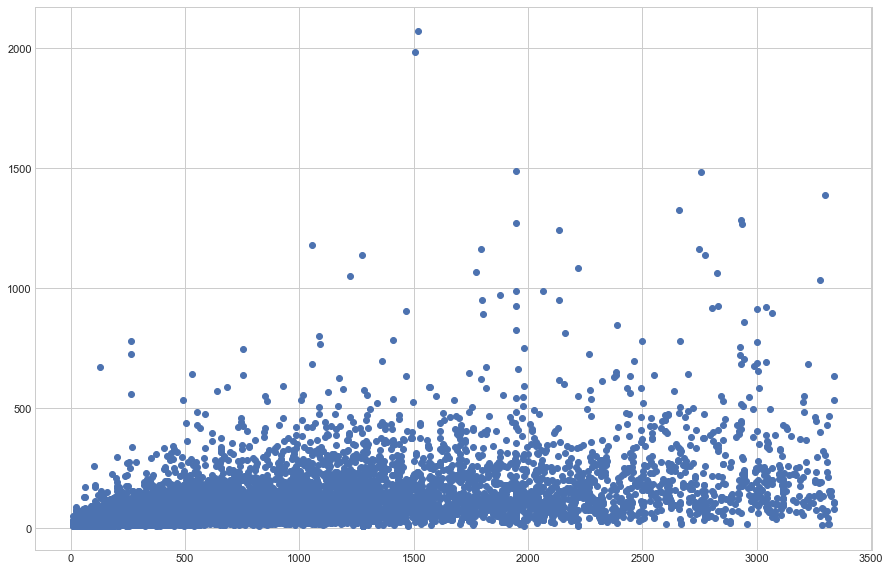

In [48]:
plt.scatter( x='follower', y ='like', data = follower_iqr)

<AxesSubplot:xlabel='follower', ylabel='like'>

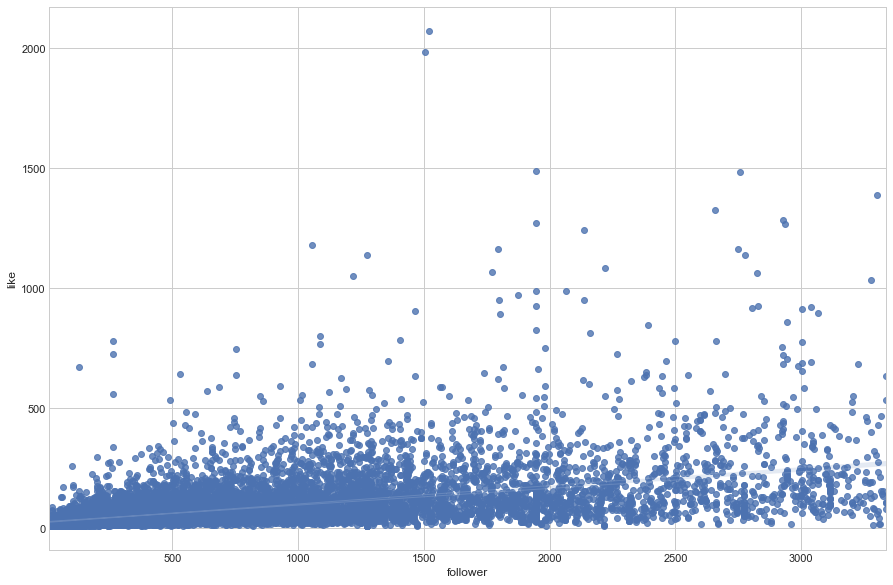

In [49]:

sns.regplot(x='follower', y = 'like', data = follower_iqr) 

In [54]:
#follower iqr
q1 = np.percentile(df['follower'], 25)
q2 = np.median(df['follower'])
q3 = np.percentile(df['follower'], 75)
iqr = np.percentile(df['follower'], 75) - np.percentile(df['follower'], 25)
follower_upper_fence = q3 + iqr*1.5
follower_lower_fence = q1 - iqr*1.5

follower_iqr = df_1[df_1['follower'] > follower_lower_fence]
follower_iqr = follower_iqr[follower_iqr['follower'] < follower_upper_fence]

#like iqr
q1 = np.percentile(follower_iqr['like'], 25)
q2 = np.median(follower_iqr['like'])
q3 = np.percentile(follower_iqr['like'], 75)
iqr = q3 - q1
like_upper_fence = q3 + iqr*1.5
like_lower_fence = q1 - iqr*1.5

like_iqr = follower_iqr[follower_iqr['like'] > like_lower_fence]
like_iqr = like_iqr[like_iqr['like'] < like_upper_fence]

#follow iqr
q1 = np.percentile(like_iqr['follow'], 25)
q2 = np.median(like_iqr['follow'])
q3 = np.percentile(like_iqr['follow'], 75)
iqr = q3 - q1
follow_upper_fence = q3 + iqr*1.5
follow_lower_fence = q1 - iqr*1.5

follow_iqr = like_iqr[like_iqr['follow'] > follow_lower_fence]
follow_iqr = follow_iqr[follow_iqr['follow'] < follow_upper_fence]


#con_count iqr
q1 = np.percentile(follow_iqr['con_count'], 25)
q2 = np.median(follow_iqr['con_count'])
q3 = np.percentile(follow_iqr['con_count'], 75)
iqr = q3 - q1
count_upper_fence = q3 + iqr*1.5
count_lower_fence = q1 - iqr*1.5

count_iqr = follow_iqr[follow_iqr['con_count'] > count_lower_fence]
count_iqr = count_iqr[count_iqr['con_count'] < count_upper_fence]

df_nooutlier = count_iqr

<AxesSubplot:xlabel='follower', ylabel='like'>

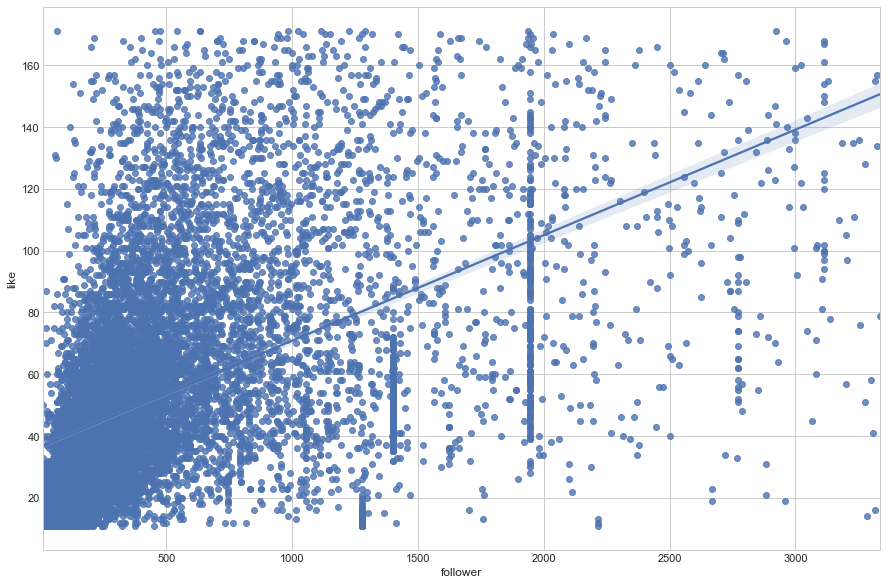

In [55]:
sns.regplot(x='follower', y = 'like', data = df_nooutlier) 

<AxesSubplot:xlabel='follow', ylabel='like'>

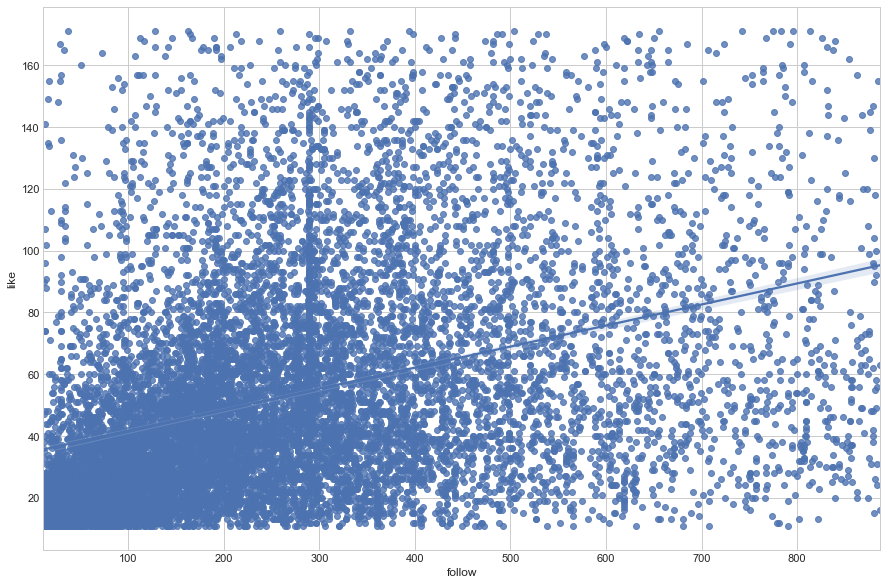

In [56]:
sns.regplot(x='follow', y = 'like', data = df_nooutlier) 

<AxesSubplot:xlabel='con_count', ylabel='like'>

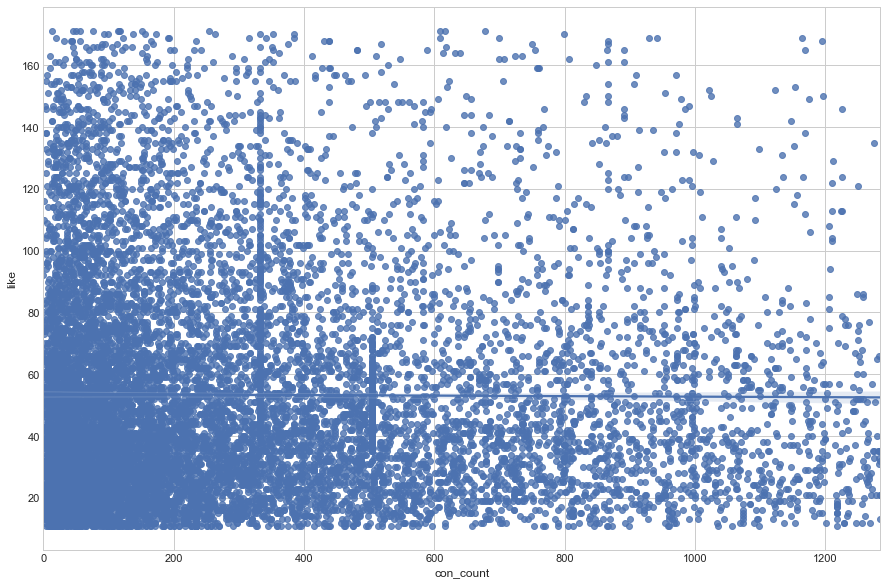

In [57]:
sns.regplot(x='con_count', y = 'like', data = df_nooutlier) 

In [58]:
X_real = df_nooutlier[['follower', 'follow', 'con_count']]
y_real = df_nooutlier['like']

In [59]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_real,y_real, test_size=0.2, random_state = 13)

In [61]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train.values, y_train)

LinearRegression()

In [62]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of train data', rmse_tr)
print('RMSE of test data', rmse_test)

RMSE of train data 28.713771945359323
RMSE of test data 28.30659904773867


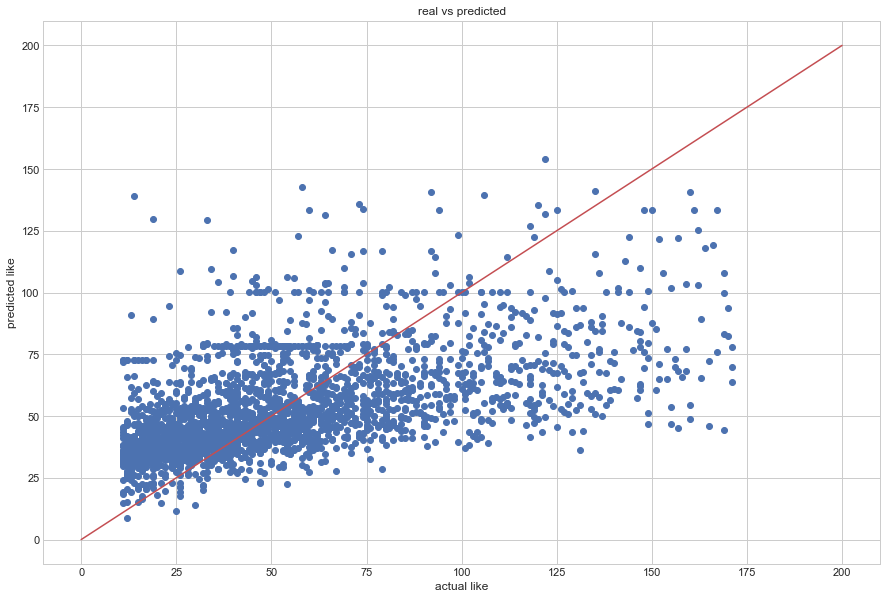

In [66]:
plt.scatter(y_test, pred_test)

plt.xlabel('actual like')
plt.ylabel('predicted like')
plt.title('real vs predicted')
plt.plot([0, 200], [0, 200], 'r')

In [67]:
from scipy import stats

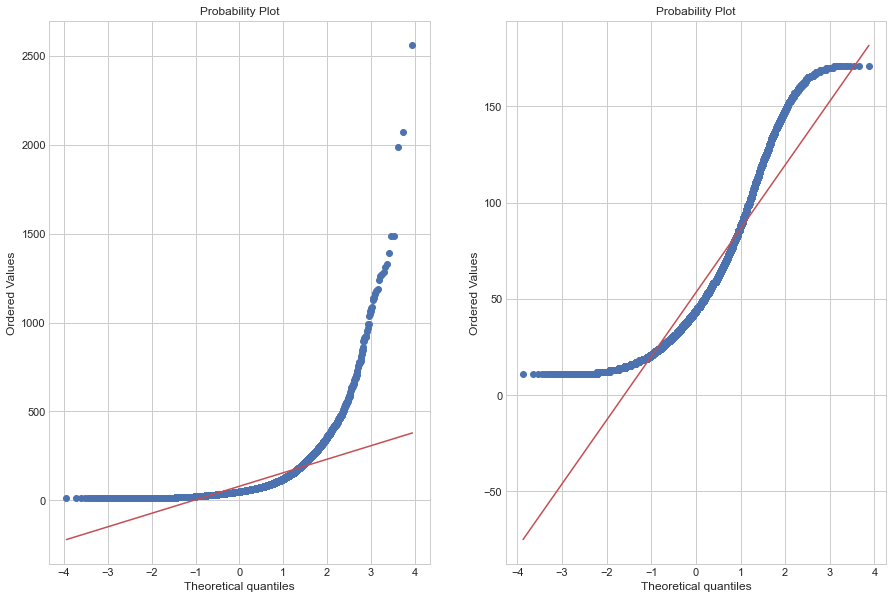

In [69]:
fig = plt.figure(figsize=(15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_1['like'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(df_nooutlier['like'], plot=plt)

In [70]:
reg.predict([[121,109,85]])

array([39.68370576])

In [71]:
reg.predict([[253,426,26]])

array([59.67309284])

In [72]:
reg.predict([[211,559,51]])

array([63.78514875])

In [73]:
reg.predict([[99,140,12]])

array([42.11373831])

In [74]:
reg.predict([[281,261,716]])

array([36.78802255])

In [76]:
reg.predict([[219,314,184]])

array([49.77605081])

In [77]:
reg.predict([[121,105,68]])

array([39.90327909])

In [78]:
reg.predict([[182,253,156]])

array([46.48896109])

In [79]:
reg.predict([[2147,1975,698]])

array([174.45206981])

In [80]:
reg.predict([[1338,148,454]])

array([71.4930876])